In [3]:
URL = "https://catalog.iastate.edu/azcourses/abe/"

In [62]:
# code needed to extract the name of the df

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [25]:
# Course Catelogue Function:

from bs4 import BeautifulSoup
import requests
import pandas as pd

def course_cat(URL):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'}
    r = requests.get(URL, headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    df_courses = pd.DataFrame(columns = ["Descriptions"])
    descriptions = soup.find_all(class_ = "prereq")
    for description in descriptions:
        description_list = description.text
        df_courses.loc[len(df_courses.index)] = [description_list]
    df_course_names = pd.DataFrame(columns = ["Names"])
    names = soup.find_all(class_ = "toggle-accordion")
    for name in names:
        coursename_list = name.text
        df_course_names.loc[len(df_course_names.index)] = [coursename_list]
    compiled = pd.concat([df_course_names, df_courses], axis=1, join='inner')
    return compiled

In [55]:
# testing section 

ABE = course_cat(URL)
ABE


,Names,Descriptions
0,A B E 102: Learning Communities,8 week learning communities course focusing on...
1,A B E 110: Experiencing Agricultural and Biosy...,"Laboratory-based, team-oriented experiences in..."
2,A B E 160: Systematic Problem Solving and Comp...,Prereq: Credit or enrollment in MATH 143 or MA...
3,A B E 170: Engineering Graphics and Introducto...,Applications of multi-view drawings and dimens...
4,A B E 201: Preparing for Workplace Seminar,Prereq: Prereq: Sophomore classification in AE...
...,...,...
88,A B E 699P: Research: Power and Machinery Engi...,Guided graduate research in power and machiner...
89,A B E 699Q: Research: Structures,Guided graduate research in structures.\n
90,A B E 699R: Research: Process Engineering,Guided graduate research in process engineerin...
91,A B E 699S: Research: Environment and Natural ...,Guided graduate research in environment and na...


In [82]:
# Course Catelogue Visual Function:

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

def course_cat_figure(compiled):
    final_list = []

    stop_words = stopwords.words('english')
    newStopWords = ['department','curriculum', 'within', 'permission', 'introduction', 'credits','216Engineering', 'equivalent8', 'week-course', 'course', 'offered', 'student', 'satisfactory-fail', 'prereq','credit', 'enrollment', '165Introduction']
    stop_words.extend(newStopWords)
    for row in compiled.iterrows():
        words = word_tokenize(row[1]['Descriptions'])
        for word in words:
            if word.lower() not in stop_words:
                if len(word) > 5:
                    final_list.append(word)
                
    text = nltk.Text(final_list)
    all_fdist = nltk.FreqDist(text).most_common(30)
    all_fdist = pd.Series(dict(all_fdist))
    fig, ax = plt.subplots(figsize=(20,10))




    name = get_df_name(compiled)
    bar_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, orient='h', ax=ax)
    plt.title('Frequencies of the Most Common Words in the ' + name + ' Course Catalogue \n (12/04/21) \n', fontsize = 24)
    plt.xlabel('Frequency', fontsize=18)
    plt.ylabel('', fontsize=18)

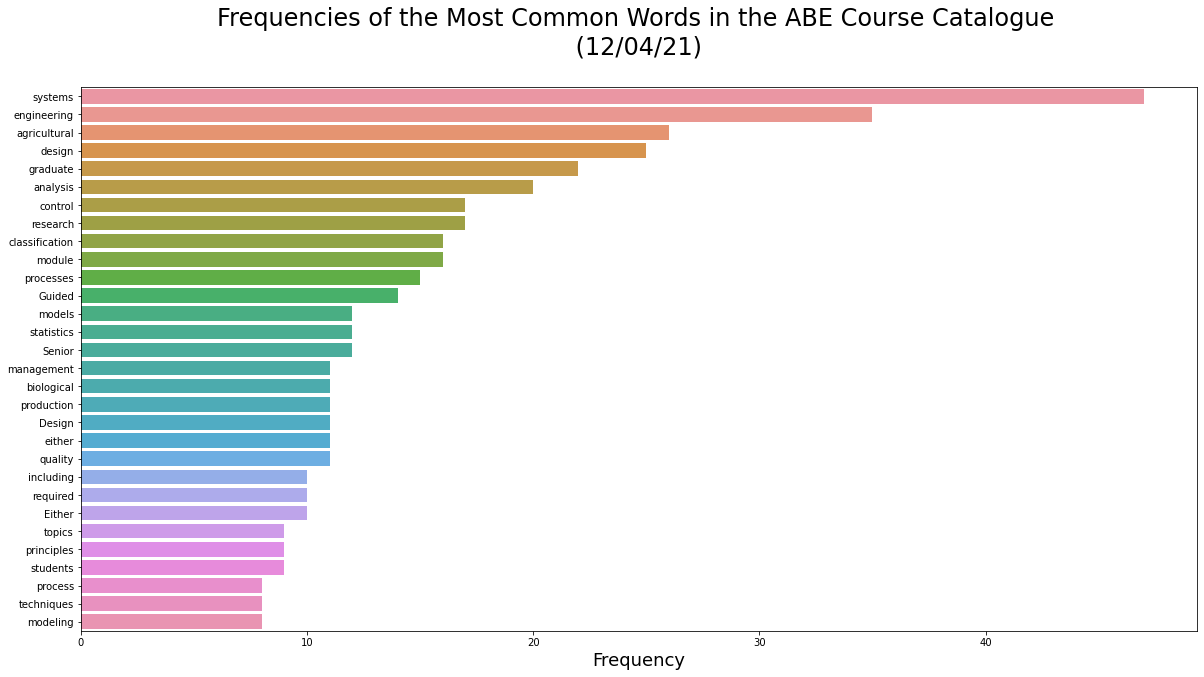

In [83]:
course_cat_figure(ABE)

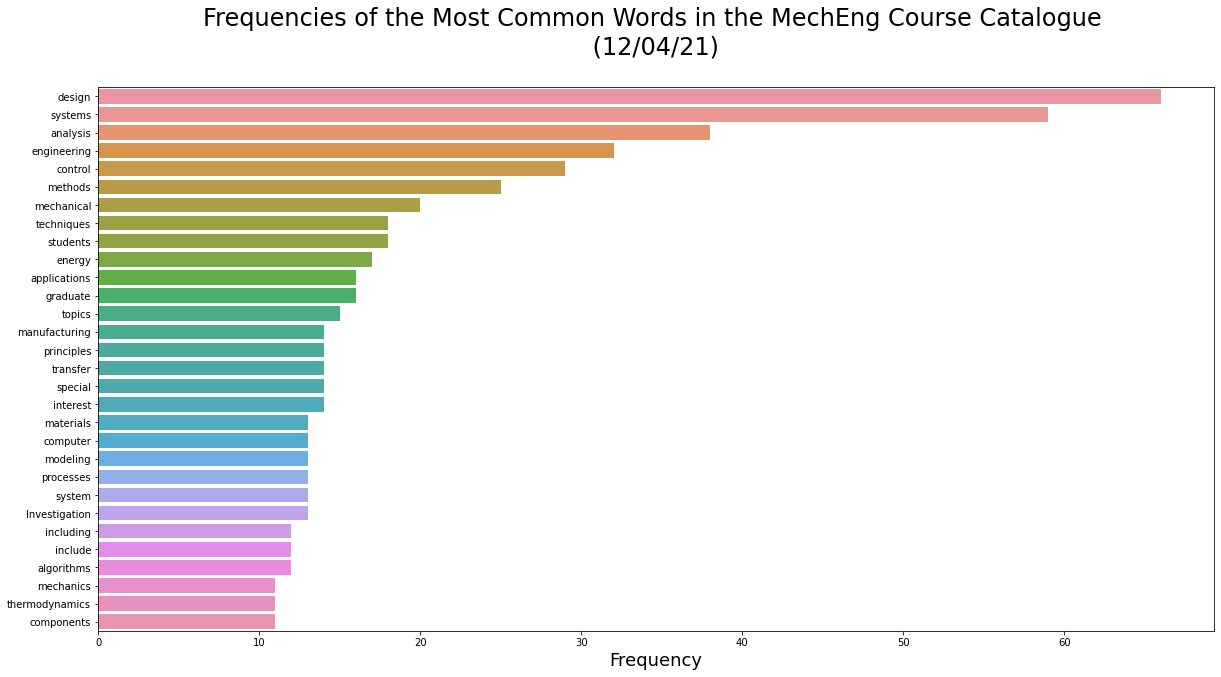

In [84]:
URL_mechE = "https://catalog.iastate.edu/collegeofengineering/mechanicalengineering/#courseinventory"
MechEng = course_cat(URL_mechE)
course_cat_figure(MechEng)


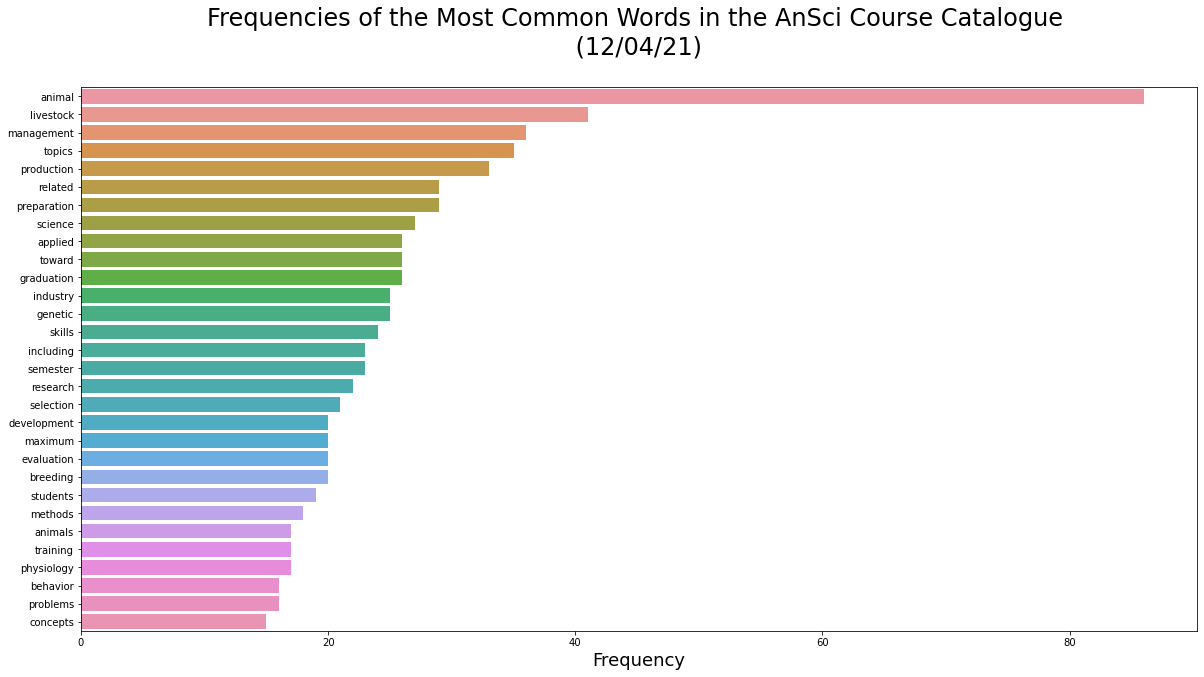

In [85]:
URL_AnSci = "https://catalog.iastate.edu/collegeofagricultureandlifesciences/animalscience/#courseinventory"
AnSci = course_cat(URL_AnSci)
course_cat_figure(AnSci)

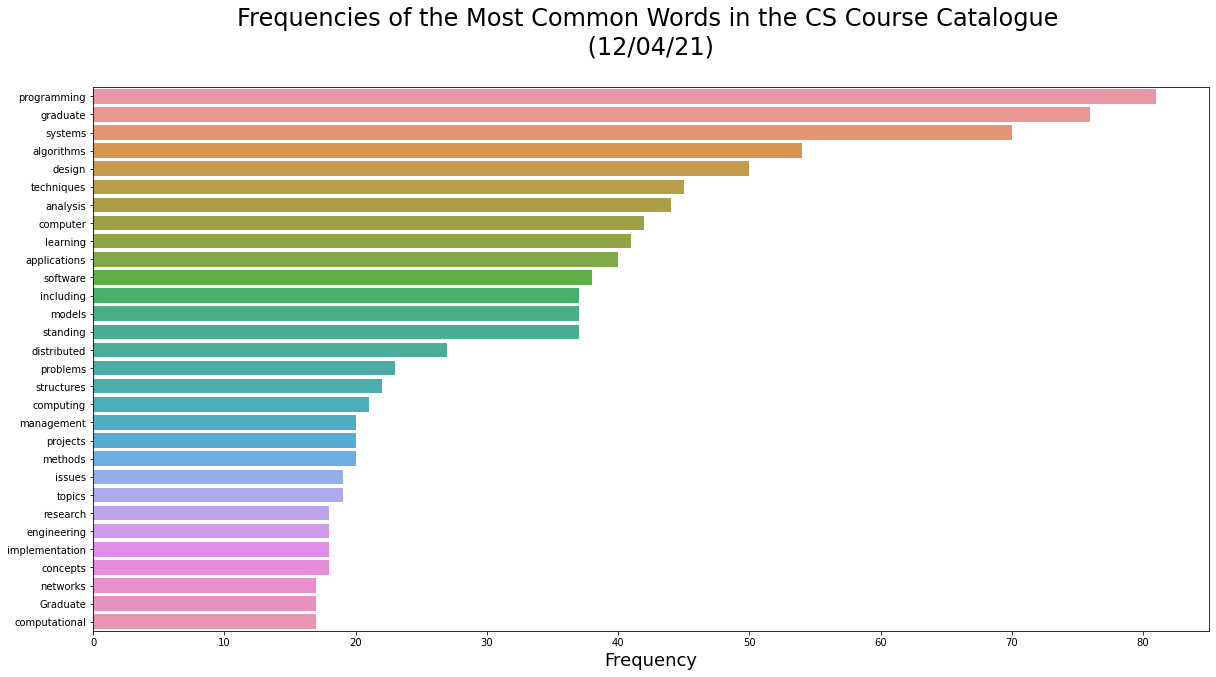

In [86]:
URL_CS = "https://catalog.iastate.edu/collegeofliberalartsandsciences/computerscience/#courseinventory"
CS = course_cat(URL_CS)
course_cat_figure(CS)

In [ ]:
titles = soup.select("h2 span") 

In [141]:
URL_purdue = "https://courses.cornell.edu/preview_program.php?catoid=31&poid=15118"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'}
r = requests.get(URL_purdue, headers = headers)
soup = BeautifulSoup(r.text, 'html.parser')
soup


<!DOCTYPE html>
<html lang="en">
<head>
<title>Departments &amp; Fields of Study: Biological and Environmental Engineering| - Cornell University - Acalog ACMS™</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="//acalog-clients.s3.amazonaws.com/production/cornell/img/favicon/favicon.ico" rel="shortcut icon"/>
<meta content="The Cornell University Courses of Study contains information primarily concerned with academic resources and procedures, college and department programs, interdisciplinary programs, and undergraduate and graduate course offerings of the university." name="description"/> <link href="//acalog-clients.s3.amazonaws.com/production/cornell/css/gateway/user-styles.css" rel="stylesheet" type="text/css"/>
<link href="css/public_custom.php" rel="stylesheet" type="text/css"/>
<link href="global_styles.css" rel="stylesheet" type="text/css"/>
<!--[if IE]>
		<link rel="stylesheet" type="text/css" href="ie.css" />
		<![endif]-->
<!-- Cache-bus

In [159]:
df_cornell = pd.DataFrame(columns = ["Descriptions"])
tests = soup.select("a")

for test in tests:
    test_list = test.text
    print(test_list)

Skip to Content

Cornell University Registrar
‌Get Directions
‌ univreg@cornell.edu

                                web-accessibility@cornell.edu
HELP
Print-Friendly Page (opens a new window)




BEE 1200 - The BEE Experience 
BEE 2000 - Perspectives on the Climate Change Challenge 
BEE 2010 - Perspectives on the Climate Change Challenge Discussion 
BEE 2220 - Bioengineering Thermodynamics and Kinetics 
BEE 2510 - Engineering Processes for Environmental Sustainability 
BEE 2600 - Principles of Biological Engineering 
BEE 3299 - Sustainable Development 
BEE 3310 - Bio-Fluid Mechanics 
BEE 3400 - Design and Analysis of Biomaterials 
BEE 3500 - Heat and Mass Transfer in Biological Engineering 
BEE 3600 - Molecular and Cellular Bioengineering 
BEE 3710 - [Physical Hydrology for Ecosystems] 
BEE 3800 - [Sustainability and Sustainable Energy Systems] 
BEE 3801 - Introduction to Nanobiotechnology 
BEE 4010 - Renewable Energy Systems 
BEE 4200 - [Surface Chemistry of Particles in Natural and 

In [170]:

tests = soup.find_all(class_ = 'acalog-core')
for test in tests:
    test_list = test.text
    print(test_list)

Courses:BEE 1200 - The BEE Experience  BEE 2000 - Perspectives on the Climate Change Challenge  BEE 2010 - Perspectives on the Climate Change Challenge Discussion  BEE 2220 - Bioengineering Thermodynamics and Kinetics  BEE 2510 - Engineering Processes for Environmental Sustainability   (crosslisted)BEE 2600 - Principles of Biological Engineering   (crosslisted)BEE 3299 - Sustainable Development  BEE 3310 - Bio-Fluid Mechanics  BEE 3400 - Design and Analysis of Biomaterials  BEE 3500 - Heat and Mass Transfer in Biological Engineering  BEE 3600 - Molecular and Cellular Bioengineering  BEE 3710 - [Physical Hydrology for Ecosystems]  BEE 3800 - [Sustainability and Sustainable Energy Systems]  BEE 3801 - Introduction to Nanobiotechnology  BEE 4010 - Renewable Energy Systems  BEE 4200 - [Surface Chemistry of Particles in Natural and Engineered Processes]  BEE 4270 - Water Measurement and Analysis Methods  BEE 4350 - Principles of Aquaculture  BEE 4400 - [Seminar on Climate Change Solutions] 

In [171]:
div = soup.find("div")
content = str(div)
print(content)

<div class="acalog-custom" id="acalog-client-javascript">
<script type="text/javascript">
    jQuery(document).ready( function($) { if ($('#gateway-page').length) {

        $('#acalog-navigation br').next('div').addClass('nav-title');
        $('#acalog-navigation br').remove();
        $('.gateway-footer-copyright-1').remove();
        $('#acalog-navigation .nav-title').each(function() {
                var navTitleText = $(this).children('a').text();
                $(this).empty().append(navTitleText);
        });


    jQuery("#edit-keys").focus(function() {
    jQuery("body").addClass("search-open");
    });


        var helpHref = $('.gateway-toolbar-help a').attr('href');
        var oid = helpHref.substring(16);

        if (oid == 45) {
                helpUrl = '/content.php?catoid=45&navoid=18079';
        }else if (oid == 41) {
                helpUrl = '/content.php?catoid=41&navoid=11673';
        }else if (oid == 36) {
                helpUrl = '/content.php?catoid=36&

In [269]:
def IndeedPostings(URL_from_indeed):
    df = pd.DataFrame(columns = ["Job_Titles"])
    df2 = pd.DataFrame(columns = ["Company"])
    df3 = pd.DataFrame(columns = ["Location"])
    df4 = pd.DataFrame(columns = ["Job_Description"])
    df5 = pd.DataFrame(columns = ["Salary (If Available)"])
    df6 = pd.DataFrame(columns = ["Link"])


    for pagenumber in range(0,500, 1):
        r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineering&start={}'.format(pagenumber), headers = headers)
        soup = BeautifulSoup(r.text, 'html.parser')
        titles = soup.select("h2 span") 
        # select all span tags under the umbrella of h2 tags 
        companies = soup.find_all(class_ = "companyName")
        locations = soup.find_all(class_ = "companyLocation")
        descriptions = soup.find_all(class_ = "job-snippet")
        salaries = soup.find_all(class_ = "salary-snippet")
        URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})

        for title in titles:
            titles_list = title.text
            # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
            df.loc[len(df.index)] = [titles_list]
            df = df[df.Job_Titles != "new"]
        
        
        for company in companies:
            company_list = company.text
            df2.loc[len(df2.index)] = [company_list]
        
        
        for location in locations:
            location_list = location.text
            df3.loc[len(df3.index)] = [location_list]
        
    
        for description in descriptions:
            description_list = description.text
            df4.loc[len(df4.index)] = [description_list]
            df4['Job_Description'] = df4['Job_Description'].str.replace(r'\n', '', regex=True)
        # Another gotcha is that you have to remove the /n in each row- but looping can take considerable more time if we used hundreds of pages
    
        for salary in salaries:
            salary_list = salary.text
            df5.loc[len(df5.index)] = [salary_list]
        
    
        for URL in URLs:
            base = 'www.indeed.com'
            link = URL.attrs['href']
            new_URL = base + link
            df6.loc[len(df6.index)] = [new_URL]
    boom = pd.concat([df, df2, df3, df4, df5, df6], axis=1)
    return(boom)


In [270]:

URL_indeed = 'https://www.indeed.com/jobs?q=agricultural%20engineer&start={pagenumber}'
indeed_table = IndeedPostings(URL_indeed)
indeed_table.head(10)

,Job_Titles,Company,Location,Job_Description,Salary (If Available),Link
0,Quality Assurance Inspector,ALMACO,"Nevada, IA 50201",Performs field tests and stress tests on ALMAC...,NaN,www.indeed.com/rc/clk?jk=bfe7bf2521c36f13&fcci...
1,Field Equipment Implementation Lead,Syngenta,"Slater, IA+1 location",Deep technical knowledge in agricultural resea...,NaN,www.indeed.com/rc/clk?jk=c9337f8f3be0aa23&fcci...
2,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+10 locations",RFA Engineering has provided machine design an...,NaN,www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...
3,Youth Services Worker,State of Iowa Talent Gateway,"Eldora, IA 50627+1 location",The new starting wage is $19.23 per hour.In ad...,NaN,www.indeed.com/rc/clk?jk=504ecc76de145404&fcci...
4,Agricultural and Biosystems Engineering - Manu...,Iowa State University,"Ames, IA",Research emphasis areas include advanced machi...,NaN,www.indeed.com/rc/clk?jk=6accb2741142c872&fcci...
5,Research Field Technician,Iowa Soybean Association,"Ankeny, IA 50023","Bachelor s degree or higher in agronomy, envir...",NaN,www.indeed.com/rc/clk?jk=13dd4aeb2b64f3d8&fcci...
6,Electronics Engineering Technician,RFA Engineering,"Des Moines, IA 50322+1 location",RFA Engineering has provided engineering servi...,NaN,www.indeed.com/rc/clk?jk=79cdb9bac0a7e4ce&fcci...
7,Designer,ALMACO,"Nevada, IA 50201",ALMACO is a manufacturer of specialized agricu...,NaN,www.indeed.com/rc/clk?jk=25dfda2c33e1f5a6&fcci...
8,EHS Engineer*,3M,"Ames, IA+10 locations","Master’s degree or higher in a science, engine...",NaN,www.indeed.com/rc/clk?jk=da8e35ddd6b904d2&fcci...
9,Industrial Engineer - Agricultural Equipment,RFA Engineering,"Ankeny, IA 50023+6 locations","As a member of our team, the selected candidat...",NaN,www.indeed.com/rc/clk?jk=3f952b80cfbe7729&fcci...


In [273]:
indeed_table.shape

(2325, 6)

In [272]:
indeed_table.tail(5)

,Job_Titles,Company,Location,Job_Description,Salary (If Available),Link
2320,Regional Reliability Engineer,Cargill,"Wayzata, MN+1 location",Deploy reliability excellence activities and i...,NaN,www.indeed.com/rc/clk?jk=d14062c7dff07a7a&fcci...
2321,Industrial Engineer,Smithfield Foods,"Des Moines, IA 50317 (Chesterfield area)+6 loc...",Confers with management and engineering staff ...,NaN,www.indeed.com/rc/clk?jk=d0e110af36795b82&fcci...
2322,"Resident Project Engineer (Knoxville, IA)*",3M,"Knoxville, IA 50138+5 locations",Two (2) years of combined experience in engine...,NaN,www.indeed.com/rc/clk?jk=053def201544ec08&fcci...
2323,Salesforce Administrator,myAgro Farms,Remote,We have pioneered a mobile savings model that ...,NaN,www.indeed.com/rc/clk?jk=62d4d7ebadbcce8d&fcci...
2324,Supervisor,Republic Steel,"Blasdell, NY 14219+1 location",Bachelor’s degree in an engineering discipline...,NaN,www.indeed.com/rc/clk?jk=946e2d49f129aafe&fcci...


In [178]:
def indeed_figure(indeed_table):
    final_list = []

    stop_words = stopwords.words('english')
    newStopWords = ['degree', 'experience', 'Experience', 'provide', 'and/or','including', 'related', 'located', 'Center', 'numerous','throughout', 'equivalent', 'week-course', 'course', 'offered', 'student', 'satisfactory-fail', 'prereq','credit', 'enrollment', '165Introduction']
    stop_words.extend(newStopWords)
    for row in indeed_table.iterrows():
        words = word_tokenize(row[1]['Job_Description'])
        for word in words:
            if word.lower() not in stop_words:
                if len(word) > 5:
                    final_list.append(word)
                
    text = nltk.Text(final_list)
    all_fdist = nltk.FreqDist(text).most_common(30)
    all_fdist = pd.Series(dict(all_fdist))
    fig, ax = plt.subplots(figsize=(20,10))




    bar_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, orient='h', ax=ax)
    plt.title('Frequencies of the Most Common Words in Indeed.com ABE Job Postings \n (12/04/21) \n', fontsize = 24)
    plt.xlabel('Frequency', fontsize=18)
    plt.ylabel('', fontsize=18)

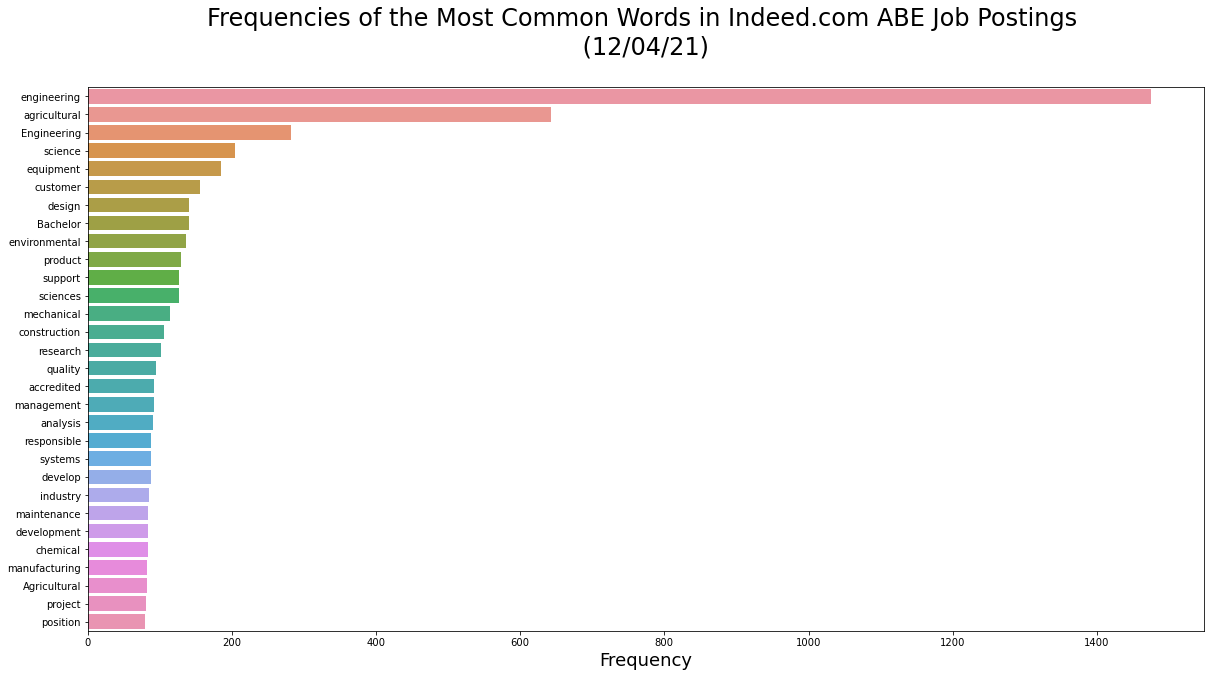

In [196]:
indeed_figure(indeed_table)

In [291]:
### final List of Words for Indeed Job Descriptions: 
final_list = []

stop_words = stopwords.words('english')
newStopWords = ['degree', 'experience', 'Experience', 'provide', 'and/or','including', 'related', 'located', 'Center', 'numerous','throughout', 'equivalent', 'week-course', 'course', 'offered', 'student', 'satisfactory-fail', 'prereq','credit', 'enrollment', '165Introduction']
stop_words.extend(newStopWords)
for row in indeed_table.iterrows():
    words = word_tokenize(row[1]['Job_Description'])
    for word in words:
        if word.lower() not in stop_words:
            if len(word) > 5:
                final_list.append(word)
text = nltk.Text(final_list)                
               
all_Indeed = nltk.FreqDist(text).most_common(30)
all_Indeed = pd.Series(dict(all_Indeed))
all_Indeed = pd.DataFrame({'Word':all_Indeed.index, 'Count':all_Indeed.values})

print(all_Indeed)

             Word  Count
0     engineering   1563
1    agricultural    724
2     Engineering    298
3         science    219
4       equipment    199
5          design    169
6   environmental    146
7        customer    144
8         product    133
9        Bachelor    131
10        support    128
11       research    122
12       sciences    119
13   construction    115
14     management    112
15     mechanical    101
16        project     99
17     accredited     97
18        systems     93
19        quality     92
20    development     91
21        develop     90
22      technical     88
23    responsible     85
24   Agricultural     83
25       industry     82
26     production     82
27       chemical     82
28      candidate     82
29       training     82


In [292]:
### final List of Words for ABE Course Catalogue Descriptions: 
final_list = []

stop_words = stopwords.words('english')
newStopWords = ['department','curriculum', 'within', 'permission', 'introduction', 'credits','216Engineering', 'equivalent8', 'week-course', 'course', 'offered', 'student', 'satisfactory-fail', 'prereq','credit', 'enrollment', '165Introduction']
stop_words.extend(newStopWords)
for row in ABE.iterrows():
    words = word_tokenize(row[1]['Descriptions'])
    for word in words:
        if word.lower() not in stop_words:
            if len(word) > 5:
                final_list.append(word)
text = nltk.Text(final_list)                
all_ABE = nltk.FreqDist(text).most_common(30)
all_ABE = pd.Series(dict(all_ABE))
all_ABE = pd.DataFrame({'Word':all_ABE.index, 'Count':all_ABE.values})
print(all_ABE)

              Word  Count
0          systems     47
1      engineering     35
2     agricultural     26
3           design     25
4         graduate     22
5         analysis     20
6          control     17
7         research     17
8   classification     16
9           module     16
10       processes     15
11          Guided     14
12          models     12
13      statistics     12
14          Senior     12
15      management     11
16      biological     11
17      production     11
18          Design     11
19          either     11
20         quality     11
21       including     10
22        required     10
23          Either     10
24          topics      9
25      principles      9
26        students      9
27         process      8
28      techniques      8
29        modeling      8


In [288]:
type(all_ABE)

pandas.core.series.Series

In [208]:
# indeed_table['Location']

indeed_table['Location_split'] = indeed_table['Location'].str.split('+').str[0]

indeed_table['Location_split2'] = indeed_table['Location_split'].str.replace('\d+', '')
indeed_table

<ipython-input-208-ea1c2802c5a1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  indeed_table['Location_split2'] = indeed_table['Location_split'].str.replace('\d+', '')


,Job_Titles,Company,Location,Job_Description,Salary (If Available),Link,Location_split,Location_split2
0,Quality Assurance Inspector,ALMACO,"Nevada, IA 50201",Performs field tests and stress tests on ALMAC...,NaN,www.indeed.com/rc/clk?jk=bfe7bf2521c36f13&fcci...,"Nevada, IA 50201","Nevada, IA"
1,Field Equipment Implementation Lead,Syngenta,"Slater, IA",Deep technical knowledge in agricultural resea...,NaN,www.indeed.com/rc/clk?jk=c9337f8f3be0aa23&fcci...,"Slater, IA","Slater, IA"
2,Youth Services Worker,State of Iowa Talent Gateway,"Eldora, IA 50627+1 location","In addition, there is shift differential at $....",NaN,www.indeed.com/rc/clk?jk=504ecc76de145404&fcci...,"Eldora, IA 50627","Eldora, IA"
3,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+4 locations",RFA Engineering has provided machine design an...,NaN,www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...,"Ames, IA 50010","Ames, IA"
4,Agricultural and Biosystems Engineering - Manu...,Iowa State University,"Ames, IA+2 locations",Research emphasis areas include advanced machi...,NaN,www.indeed.com/rc/clk?jk=6accb2741142c872&fcci...,"Ames, IA","Ames, IA"
...,...,...,...,...,...,...,...,...
2230,Account Technician,North Dakota State University,"Fargo, ND",The Department offers bachelor’s and master’s ...,NaN,NaN,"Fargo, ND","Fargo, ND"
2231,Electrical Engineer,Shivvers Manufacturing,"Corydon, IA 50060",Ability to conceptualize and work from enginee...,NaN,NaN,"Corydon, IA 50060","Corydon, IA"
2232,Mechanical Engineer,Richway Industries,"Janesville, IA 50647",1-5 years engineering work experience.Collabor...,NaN,NaN,"Janesville, IA 50647","Janesville, IA"
2233,Senior Engineer - Embedded Software,Vermeer Corporation,"Ames, IA 50010",The Senior Engineer - Embedded Software applie...,NaN,NaN,"Ames, IA 50010","Ames, IA"


In [219]:
indeed_table[['City', 'State']] = indeed_table['Location_split2'].str.split(',', expand=True)
indeed_table

,Job_Titles,Company,Location,Job_Description,Salary (If Available),Link,Location_split,Location_split2,test1,test2,State,City
0,Quality Assurance Inspector,ALMACO,"Nevada, IA 50201",Performs field tests and stress tests on ALMAC...,NaN,www.indeed.com/rc/clk?jk=bfe7bf2521c36f13&fcci...,"Nevada, IA 50201","Nevada, IA",Nevada,IA,IA,Nevada
1,Field Equipment Implementation Lead,Syngenta,"Slater, IA",Deep technical knowledge in agricultural resea...,NaN,www.indeed.com/rc/clk?jk=c9337f8f3be0aa23&fcci...,"Slater, IA","Slater, IA",Slater,IA,IA,Slater
2,Youth Services Worker,State of Iowa Talent Gateway,"Eldora, IA 50627+1 location","In addition, there is shift differential at $....",NaN,www.indeed.com/rc/clk?jk=504ecc76de145404&fcci...,"Eldora, IA 50627","Eldora, IA",Eldora,IA,IA,Eldora
3,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+4 locations",RFA Engineering has provided machine design an...,NaN,www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...,"Ames, IA 50010","Ames, IA",Ames,IA,IA,Ames
4,Agricultural and Biosystems Engineering - Manu...,Iowa State University,"Ames, IA+2 locations",Research emphasis areas include advanced machi...,NaN,www.indeed.com/rc/clk?jk=6accb2741142c872&fcci...,"Ames, IA","Ames, IA",Ames,IA,IA,Ames
...,...,...,...,...,...,...,...,...,...,...,...,...
2230,Account Technician,North Dakota State University,"Fargo, ND",The Department offers bachelor’s and master’s ...,NaN,NaN,"Fargo, ND","Fargo, ND",Fargo,ND,ND,Fargo
2231,Electrical Engineer,Shivvers Manufacturing,"Corydon, IA 50060",Ability to conceptualize and work from enginee...,NaN,NaN,"Corydon, IA 50060","Corydon, IA",Corydon,IA,IA,Corydon
2232,Mechanical Engineer,Richway Industries,"Janesville, IA 50647",1-5 years engineering work experience.Collabor...,NaN,NaN,"Janesville, IA 50647","Janesville, IA",Janesville,IA,IA,Janesville
2233,Senior Engineer - Embedded Software,Vermeer Corporation,"Ames, IA 50010",The Senior Engineer - Embedded Software applie...,NaN,NaN,"Ames, IA 50010","Ames, IA",Ames,IA,IA,Ames


In [220]:
indeed_table_final = indeed_table.drop(['Location_split', 'Location_split2', 'Location', 'test1', 'test2'], axis=1)
indeed_table_final

,Job_Titles,Company,Job_Description,Salary (If Available),Link,State,City
0,Quality Assurance Inspector,ALMACO,Performs field tests and stress tests on ALMAC...,NaN,www.indeed.com/rc/clk?jk=bfe7bf2521c36f13&fcci...,IA,Nevada
1,Field Equipment Implementation Lead,Syngenta,Deep technical knowledge in agricultural resea...,NaN,www.indeed.com/rc/clk?jk=c9337f8f3be0aa23&fcci...,IA,Slater
2,Youth Services Worker,State of Iowa Talent Gateway,"In addition, there is shift differential at $....",NaN,www.indeed.com/rc/clk?jk=504ecc76de145404&fcci...,IA,Eldora
3,Entry Level Software Engineer,RFA Engineering,RFA Engineering has provided machine design an...,NaN,www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...,IA,Ames
4,Agricultural and Biosystems Engineering - Manu...,Iowa State University,Research emphasis areas include advanced machi...,NaN,www.indeed.com/rc/clk?jk=6accb2741142c872&fcci...,IA,Ames
...,...,...,...,...,...,...,...
2230,Account Technician,North Dakota State University,The Department offers bachelor’s and master’s ...,NaN,NaN,ND,Fargo
2231,Electrical Engineer,Shivvers Manufacturing,Ability to conceptualize and work from enginee...,NaN,NaN,IA,Corydon
2232,Mechanical Engineer,Richway Industries,1-5 years engineering work experience.Collabor...,NaN,NaN,IA,Janesville
2233,Senior Engineer - Embedded Software,Vermeer Corporation,The Senior Engineer - Embedded Software applie...,NaN,NaN,IA,Ames


In [235]:
indeed_table_final['State'].value_counts()

 IA                       306
 IA                       206
 MN                        96
 IL                        63
 CO                        54
                         ... 
 MO (Cooper Park area)      3
 CA•Remote                  3
 PA                         2
 AR                         2
 IA  (Manawa area)          1
Name: State, Length: 101, dtype: int64

In [238]:
indeed_table_final['State'].str.split(' ', expand=True)

,0,1,2,3,4,5,6,7
0,,IA,,None,None,None,None,None
1,,IA,None,None,None,None,None,None
2,,IA,,None,None,None,None,None
3,,IA,,None,None,None,None,None
4,,IA,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
2230,,ND,None,None,None,None,None,None
2231,,IA,,None,None,None,None,None
2232,,IA,,None,None,None,None,None
2233,,IA,,None,None,None,None,None


In [244]:
indeed_table_final

,Job_Titles,Company,Job_Description,Salary (If Available),Link,State,City
0,Quality Assurance Inspector,ALMACO,Performs field tests and stress tests on ALMAC...,NaN,www.indeed.com/rc/clk?jk=bfe7bf2521c36f13&fcci...,IA,Nevada
1,Field Equipment Implementation Lead,Syngenta,Deep technical knowledge in agricultural resea...,NaN,www.indeed.com/rc/clk?jk=c9337f8f3be0aa23&fcci...,IA,Slater
2,Youth Services Worker,State of Iowa Talent Gateway,"In addition, there is shift differential at $....",NaN,www.indeed.com/rc/clk?jk=504ecc76de145404&fcci...,IA,Eldora
3,Entry Level Software Engineer,RFA Engineering,RFA Engineering has provided machine design an...,NaN,www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...,IA,Ames
4,Agricultural and Biosystems Engineering - Manu...,Iowa State University,Research emphasis areas include advanced machi...,NaN,www.indeed.com/rc/clk?jk=6accb2741142c872&fcci...,IA,Ames
...,...,...,...,...,...,...,...
2230,Account Technician,North Dakota State University,The Department offers bachelor’s and master’s ...,NaN,NaN,ND,Fargo
2231,Electrical Engineer,Shivvers Manufacturing,Ability to conceptualize and work from enginee...,NaN,NaN,IA,Corydon
2232,Mechanical Engineer,Richway Industries,1-5 years engineering work experience.Collabor...,NaN,NaN,IA,Janesville
2233,Senior Engineer - Embedded Software,Vermeer Corporation,The Senior Engineer - Embedded Software applie...,NaN,NaN,IA,Ames


In [252]:
test = indeed_table_final['State'].str.split(' ', expand=True)
test


,0,1,2,3,4,5,6,7
0,,IA,,None,None,None,None,None
1,,IA,None,None,None,None,None,None
2,,IA,,None,None,None,None,None
3,,IA,,None,None,None,None,None
4,,IA,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
2230,,ND,None,None,None,None,None,None
2231,,IA,,None,None,None,None,None
2232,,IA,,None,None,None,None,None
2233,,IA,,None,None,None,None,None


In [259]:

test2 = test[1].str.split('•', expand=True)

state_counts = test2[0].value_counts()
state_counts

IA    590
MN    140
IL    125
ND    103
CA     80
CO     73
TX     71
NC     66
TN     59
WI     54
MO     50
NE     48
KS     46
FL     44
OH     44
AL     39
MI     37
SD     36
PA     29
AR     29
IN     26
DC     24
MT     21
VA     20
NY     17
WA     16
MD     15
MA     14
OR     13
GA     13
SC     13
WY     12
HI      9
UT      9
AZ      8
MS      8
NV      7
ID      5
KY      5
NJ      5
OK      4
NM      4
Name: 0, dtype: int64

In [262]:
type(state_counts)
state_count = pd.DataFrame({'State':state_counts.index, 'Count':state_counts.values})

In [228]:
# Import geopandas package
import geopandas as gpd
# Read in shapefile and examine data
contiguous_usa = gpd.read_file('/Users/ryanjeon/Desktop/ABE516/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
contiguous_usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [266]:
# Merge shapefile with population data
pop_states = contiguous_usa.merge(state_count, left_on = 'STUSPS', right_on = 'State')
pop_states
pop_states = pop_states.loc[~pop_states['NAME'].isin(['Alaska', 'Hawaii'])]

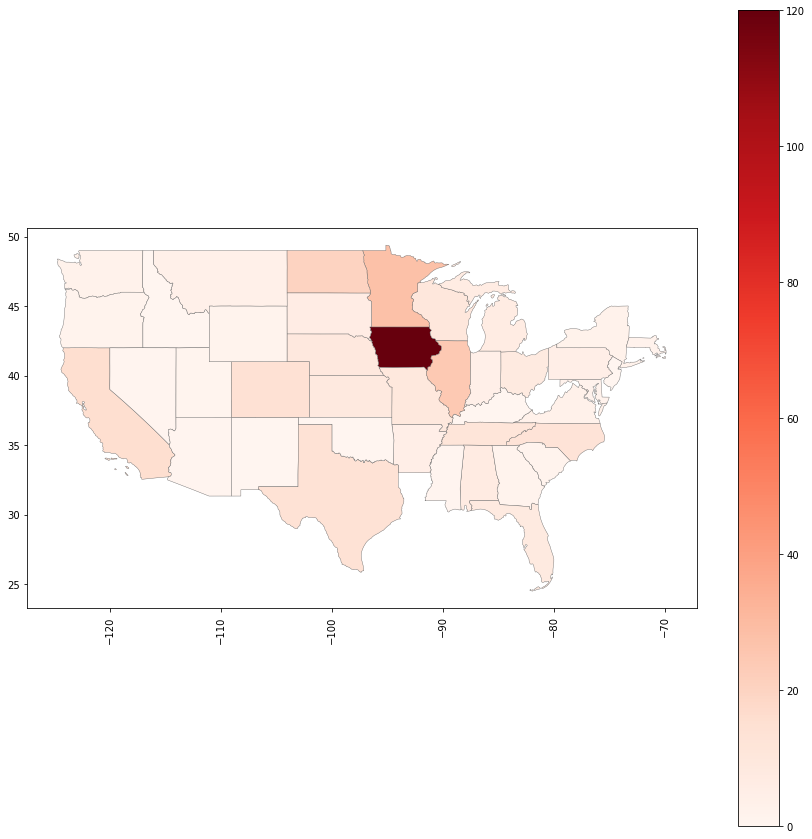

In [275]:
fig, ax = plt.subplots(1, figsize=(15, 15))
plt.xticks(rotation=90)
pop_states.plot(column="Count", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=120))
bar_info._A = []
cbar = fig.colorbar(bar_info)

In [191]:
# using geopandas

location_test.head(5)





























,Job_Titles,Company,Location,Job_Description,Salary (If Available),Link,one
0,Field Equipment Implementation Lead,Syngenta,"Slater, IA",Deep technical knowledge in agricultural resea...,NaN,www.indeed.com/rc/clk?jk=c9337f8f3be0aa23&fcci...,Slater
1,Quality Assurance Inspector,ALMACO,"Nevada, IA 50201",Performs field tests and stress tests on ALMAC...,NaN,www.indeed.com/rc/clk?jk=bfe7bf2521c36f13&fcci...,Nevada
2,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+4 locations",RFA Engineering has provided machine design an...,NaN,www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...,Ames
3,Youth Services Worker,State of Iowa Talent Gateway,"Eldora, IA 50627+1 location","In addition, there is shift differential at $....",NaN,www.indeed.com/rc/clk?jk=504ecc76de145404&fcci...,Eldora
4,Agricultural and Biosystems Engineering - Manu...,Iowa State University,"Ames, IA+2 locations",Research emphasis areas include advanced machi...,NaN,www.indeed.com/rc/clk?jk=6accb2741142c872&fcci...,Ames


,Job_Titles,Company,Location,Job_Description,Salary (If Available),Link,one
0,Field Equipment Implementation Lead,Syngenta,"Slater, IA",Deep technical knowledge in agricultural resea...,NaN,www.indeed.com/rc/clk?jk=c9337f8f3be0aa23&fcci...,Slater
1,Quality Assurance Inspector,ALMACO,"Nevada, IA 50201",Performs field tests and stress tests on ALMAC...,NaN,www.indeed.com/rc/clk?jk=bfe7bf2521c36f13&fcci...,Nevada
2,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+4 locations",RFA Engineering has provided machine design an...,NaN,www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...,Ames
3,Youth Services Worker,State of Iowa Talent Gateway,"Eldora, IA 50627+1 location","In addition, there is shift differential at $....",NaN,www.indeed.com/rc/clk?jk=504ecc76de145404&fcci...,Eldora
4,Agricultural and Biosystems Engineering - Manu...,Iowa State University,"Ames, IA+2 locations",Research emphasis areas include advanced machi...,NaN,www.indeed.com/rc/clk?jk=6accb2741142c872&fcci...,Ames
...,...,...,...,...,...,...,...
1495,Management Trainee,Meade Tractor,"Kingsport, TN 37663+8 locations","Minimum 2 years’ experience in engineering, sa...",NaN,NaN,Kingsport
1496,Loan Specialist,US Department of Energy - Agency Wide,"Washington, DC",Specialized Experience (for positions above GS...,NaN,NaN,Washington
1497,Agricultural Project Engineer,Mannik & Smith,"North Canton, OH",Execute work for a variety of agricultural and...,NaN,NaN,North Canton
1498,Assistant Fermentation Scientist,Elemental Enzymes,"St. Louis, MO 63132",Individuals with a bachelor's degree in bioche...,NaN,NaN,St. Louis


In [101]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'}
df = pd.DataFrame(columns = ["Job_Titles"])
df2 = pd.DataFrame(columns = ["Company"])
df3 = pd.DataFrame(columns = ["Location"])
df4 = pd.DataFrame(columns = ["Job_Description"])
df5 = pd.DataFrame(columns = ["Salary (If Available)"])
df6 = pd.DataFrame(columns = ["Link"])


for pagenumber in range(0,1,10):
    r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineering&start={}'.format(pagenumber), headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    titles = soup.select("h2 span") 
    # select all span tags under the umbrella of h2 tags 
    companies = soup.find_all(class_ = "companyName")
    locations = soup.find_all(class_ = "companyLocation")
    descriptions = soup.find_all(class_ = "job-snippet")
    salaries = soup.find_all(class_ = "salary-snippet")
    URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})

    for title in titles:
        titles_list = title.text
        # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
        df.loc[len(df.index)] = [titles_list]
        df = df[df.Job_Titles != "new"]
        
        
    for company in companies:
        company_list = company.text
        df2.loc[len(df2.index)] = [company_list]
        
        
    for location in locations:
        location_list = location.text
        df3.loc[len(df3.index)] = [location_list]
        
    
    for description in descriptions:
        description_list = description.text
        df4.loc[len(df4.index)] = [description_list]
        df4['Job_Description'] = df4['Job_Description'].str.replace(r'\n', '', regex=True)
        # Another gotcha is that you have to remove the /n in each row- but looping can take considerable more time if we used hundreds of pages
    
    for salary in salaries:
        salary_list = salary.text
        df5.loc[len(df5.index)] = [salary_list]
        
    
    for URL in URLs:
        base = 'www.indeed.com'
        link = URL.attrs['href']
        new_URL = base + link
        df6.loc[len(df6.index)] = [new_URL]



##################
from IPython.display import display, HTML
badabingbadaboom = pd.concat([df, df2, df3, df4, df5, df6], axis=1)
display(badabingbadaboom)
#badabingbadaboom.to_csv('career_data.csv')

,Job_Titles,Company,Location,Job_Description,Salary (If Available),Link
0,Quality Assurance Inspector,ALMACO,"Nevada, IA 50201",Performs field tests and stress tests on ALMAC...,NaN,www.indeed.com/rc/clk?jk=bfe7bf2521c36f13&fcci...
1,Youth Services Worker,State of Iowa Talent Gateway,"Eldora, IA 50627+1 location","In addition, there is shift differential at $....",NaN,www.indeed.com/rc/clk?jk=504ecc76de145404&fcci...
2,Field Equipment Implementation Lead,Syngenta,"Slater, IA+1 location",Deep technical knowledge in agricultural resea...,NaN,www.indeed.com/rc/clk?jk=c9337f8f3be0aa23&fcci...
3,Designer,ALMACO,"Nevada, IA 50201","Previous agricultural, manufacturing, or mecha...",NaN,www.indeed.com/rc/clk?jk=25dfda2c33e1f5a6&fcci...
4,Electronics Engineering Technician,RFA Engineering,"Des Moines, IA 50322+1 location",Our primary focus is product development of of...,NaN,www.indeed.com/rc/clk?jk=79cdb9bac0a7e4ce&fcci...
5,Research Field Technician,Iowa Soybean Association,"Ankeny, IA 50023","Bachelor s degree or higher in agronomy, envir...",NaN,www.indeed.com/rc/clk?jk=13dd4aeb2b64f3d8&fcci...
6,"Product Manager, Floaters",John Deere,"Ankeny, IA 50023",Partner with engineering to prioritize the val...,NaN,www.indeed.com/rc/clk?jk=4c84b84ea8fd2ec0&fcci...
7,Agricultural and Biosystems Engineering - Assi...,Iowa State University,"Ames, IA",Research emphasis areas include advanced machi...,NaN,www.indeed.com/rc/clk?jk=0f42b402a5c44334&fcci...
8,AGRICULTURAL MANAGEMENT TRAINEE,"Dole Food Company, Inc.",Hawaii+1 location,"Assists Manager, Agriculture with upgrades and...",NaN,www.indeed.com/rc/clk?jk=6bbc340f5d2a591d&fcci...
9,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+10 locations",RFA Engineering has provided machine design an...,NaN,www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...
